In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, f1_score, auc 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
def score_data_classify(y_test, predictions):
    accuracy = accuracy_score(y_test, predictions)
    print("accuracy: ", accuracy)
    
    precision = precision_score(y_test, predictions, average = "weighted")
    print("precision: ", precision)
    
    recall = recall_score(y_test, predictions, average = "weighted")
    print("recall: ", recall)
    
    f1 = f1_score(y_test, predictions, average='weighted')
    print("F1-score: ", f1)
    
    
    data = {"y_predicted": predictions, "y_actual":y_test}
    df_conf = pd.DataFrame(data,columns = ['y_actual', "y_predicted"])
    confusion_matrix = pd.crosstab(df_conf["y_actual"], df_conf['y_predicted'], rownames = ['predicted'], colnames = ['actual'])

    sns.heatmap(confusion_matrix, annot=True, cmap = "Blues", fmt = "g")

In [3]:
def display_roc(model, X, y):

    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(X)

    probability = cross_val_predict(model, scaled_features, y, cv=10, method = 'predict_proba')
    class_labels = ['Low Risk', 'High Risk']
    n_classes = len(class_labels)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    plt.figure()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y == i, probability[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'ROC curve({class_labels[i]})  (area = {roc_auc[i]:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)', fontname = 'Times New Roman', fontsize = 10)
    plt.ylabel('True Positive Rate (TPR)', fontname = 'Times New Roman', fontsize = 10)
    plt.title('ROC curve for given model', fontname = 'Times New Roman', fontsize = 10)
    plt.grid()
    plt.legend(loc='lower right', prop = {'size': 10, 'family': 'Times New Roman'})
    plt.show()

In [4]:
#dataset: https://www.kaggle.com/datasets/juledz/heart-attack-prediction/data
data = pd.read_csv(r"C:\Users\cmlon\OneDrive\Desktop\Homework\heart.csv")

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,0.85
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0.40
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0.15
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,0.82


In [6]:
data.loc[data['target'] > .5, 'target'] = 1
data.loc[data['target'] < .5, 'target'] = 0

In [7]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1.0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0.0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0.0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1.0


In [8]:
X = data.drop(['target'], axis = 1)
y = data['target']

In [9]:
y.value_counts()

1.0    526
0.0    499
Name: target, dtype: int64

In [10]:
#find the correlation values
correlations = X.corrwith(y)

In [11]:
#find the features with the best correlation and drop the worst ones. 
# This is used later in the with feature selection tests.
sorted_features = correlations.abs().sort_values(ascending=False)
print(sorted_features)
select = correlations.abs().sort_values(ascending=False).index[:-4]

oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
dtype: float64


In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [14]:
print(select)

Index(['oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal', 'sex',
       'age'],
      dtype='object')


In [54]:
print(X_lda)

[[ 0.64397803]
 [ 1.9880702 ]
 [ 2.13150099]
 ...
 [ 1.41447623]
 [-1.43120244]
 [ 1.22823234]]


In [15]:
#with default data

In [16]:
kf = KFold(n_splits=10, shuffle = True, random_state = 42)

In [17]:
dec_tree = DecisionTreeClassifier(max_depth = 7)

In [18]:
y_pred = cross_val_predict(dec_tree, X, y, cv=kf)

accuracy:  0.975609756097561
precision:  0.9756104065684926
recall:  0.975609756097561
F1-score:  0.9756091521193283


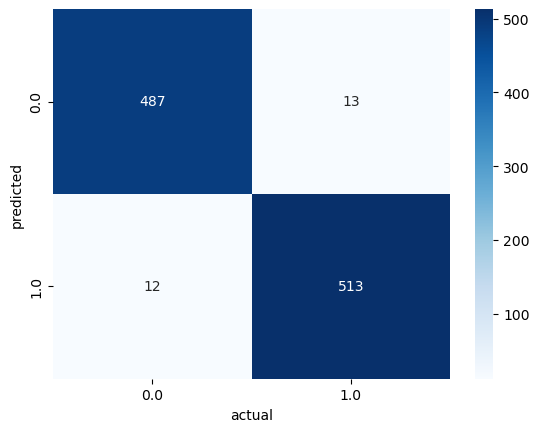

In [19]:
score_data_classify(y_pred, y)

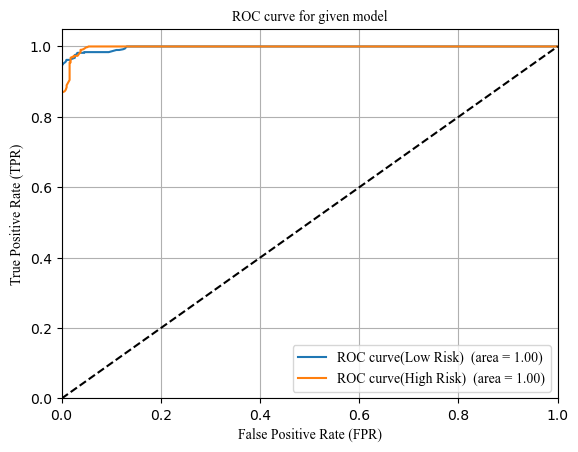

In [20]:
display_roc(dec_tree, X, y)

In [21]:
#the feature names here are just used as placeholders so the tree can be displayed
# X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
# dec_tree.fit(X_train, y_train)
#feature_names = [item for item in data.columns]
#class_names = ["low risk", "high risk"]

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6), dpi = 2**8-1)

#tree.plot_tree(dec_tree,
  #             feature_names = feature_names, 
 #              class_names = class_names,
 #             filled = True)

In [22]:
bayes = GaussianNB()

In [23]:
bayes_predict = cross_val_predict(bayes, X, y, cv=kf)

accuracy:  0.8253658536585365
precision:  0.8283060677601145
recall:  0.8253658536585365
F1-score:  0.8257610014839065


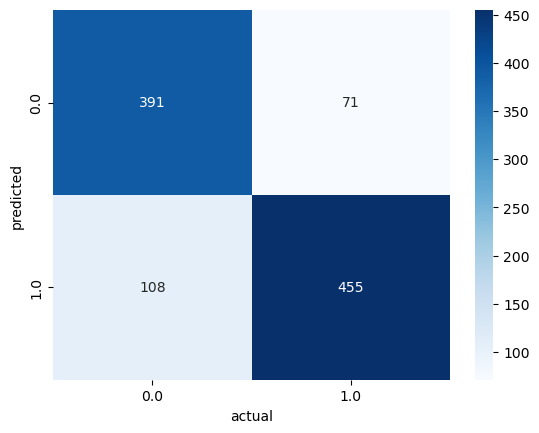

In [24]:
score_data_classify(bayes_predict, y)

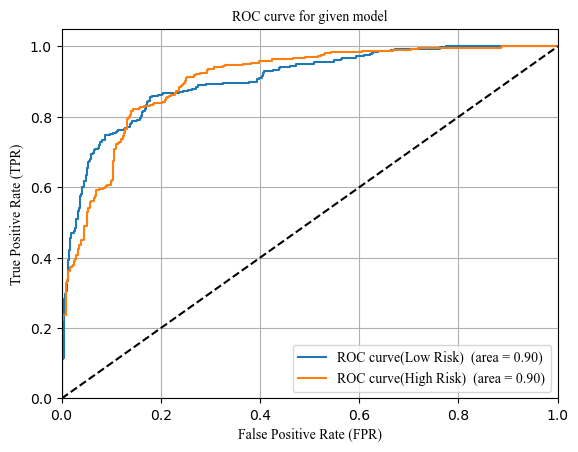

In [25]:
display_roc(bayes, X, y)

In [26]:
logmodel = LogisticRegression(max_iter = 1000)

In [27]:
lpredictions = cross_val_predict(logmodel, X, y, cv = kf)

accuracy:  0.8448780487804878
precision:  0.8506519149771303
recall:  0.8448780487804878
F1-score:  0.8455079102310092


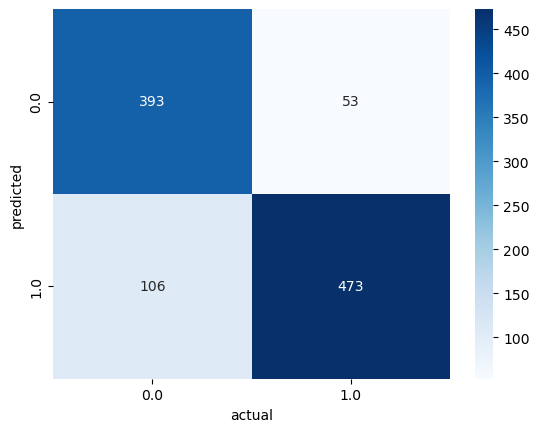

In [28]:
score_data_classify(lpredictions, y)

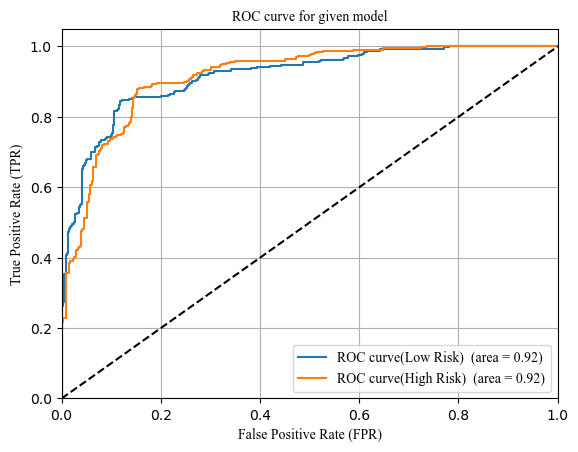

In [29]:
display_roc(logmodel, X, y)

In [30]:
knn = KNeighborsClassifier()
kpredict = cross_val_predict(knn, X, y, cv = kf)

accuracy:  0.7473170731707317
precision:  0.7483548790988265
recall:  0.7473170731707317
F1-score:  0.7473170731707316


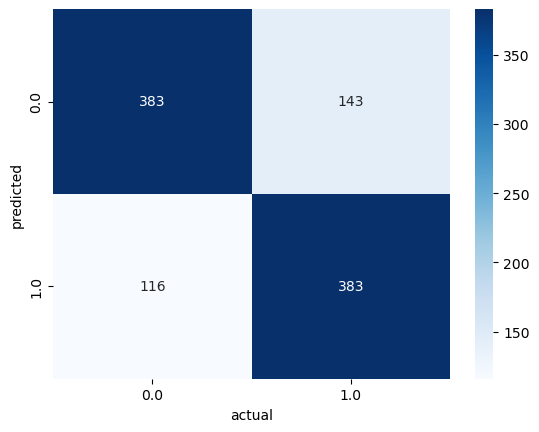

In [31]:
score_data_classify(kpredict, y)

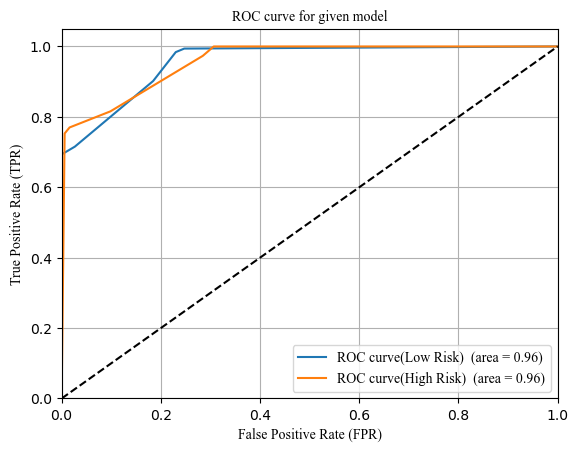

In [32]:
display_roc(knn, X, y)

In [33]:
#with feature selection
X2 = X[select]

accuracy:  0.9609756097560975
precision:  0.9611135839331448
recall:  0.9609756097560975
F1-score:  0.9609860222101363


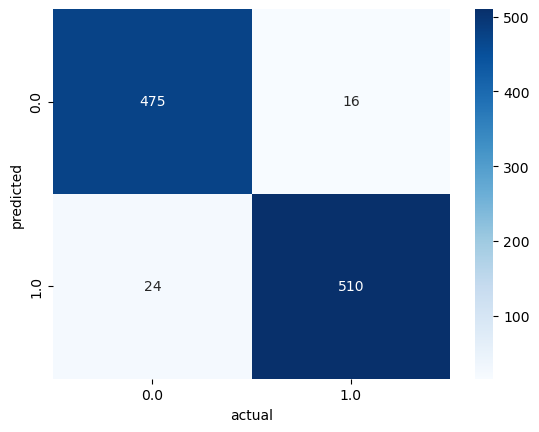

In [34]:
dec_tree_sel = DecisionTreeClassifier(max_depth = 7)
y_pred_sel = cross_val_predict(dec_tree_sel, X2, y, cv=kf)
score_data_classify(y_pred_sel, y)

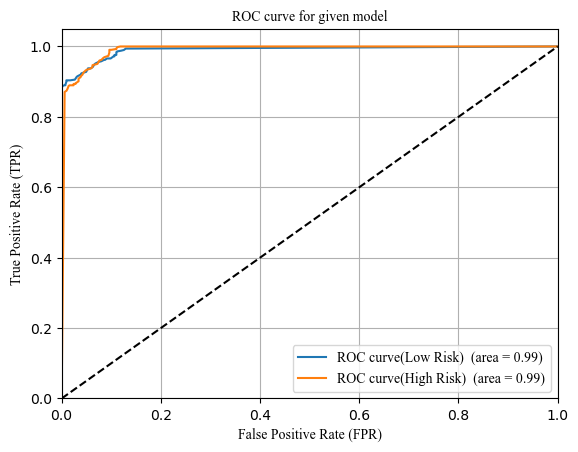

In [35]:
display_roc(dec_tree_sel, X2, y)

In [36]:
bayes_sel = GaussianNB()

In [37]:
bayes_predict_sel = cross_val_predict(bayes_sel, X2, y, cv=kf)

accuracy:  0.8263414634146341
precision:  0.8283238757957351
recall:  0.8263414634146341
F1-score:  0.8266249872852985


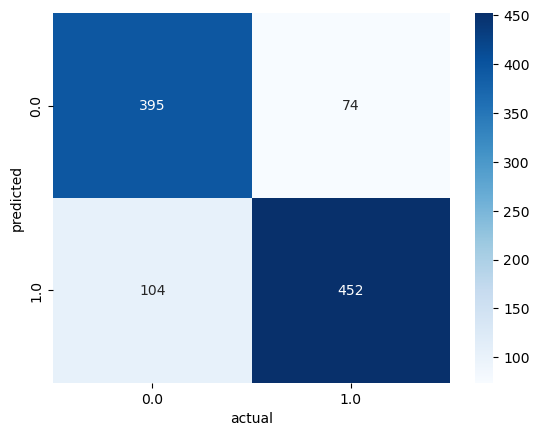

In [38]:
score_data_classify(bayes_predict_sel, y)

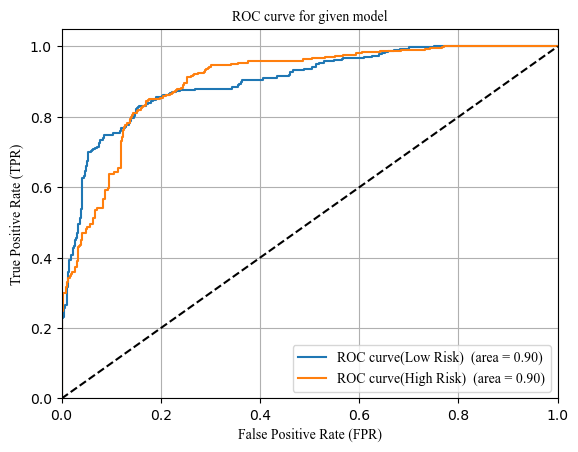

In [39]:
display_roc(bayes_sel, X2, y)

accuracy:  0.84
precision:  0.8437059670672143
recall:  0.84
F1-score:  0.8404433463624333


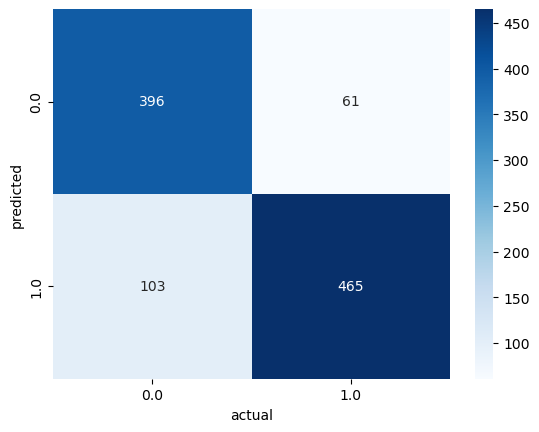

In [40]:
logmodel_sel = LogisticRegression(max_iter = 1000)
lpredictions_sel = cross_val_predict(logmodel_sel, X2, y, cv = kf)
score_data_classify(lpredictions_sel, y)

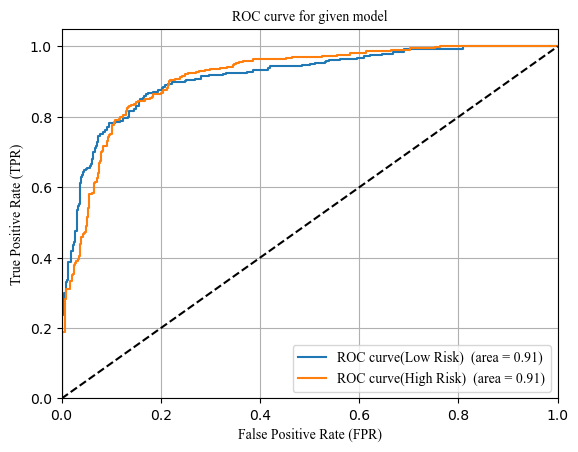

In [41]:
display_roc(logmodel_sel, X2, y)

accuracy:  0.7960975609756098
precision:  0.7962643157036506
recall:  0.7960975609756098
F1-score:  0.7961438022466599


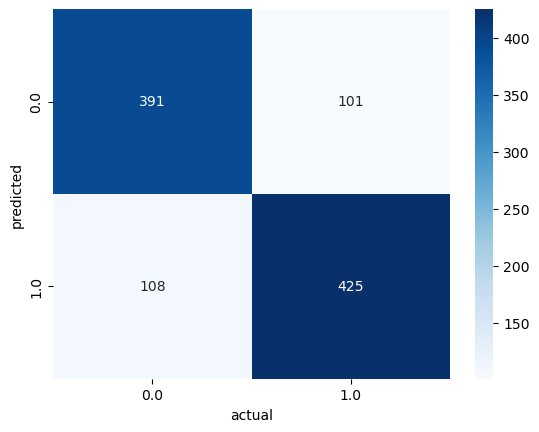

In [42]:
knn_sel = KNeighborsClassifier()
kpredict_sel = cross_val_predict(knn_sel, X2, y, cv = kf)
score_data_classify(kpredict_sel, y)

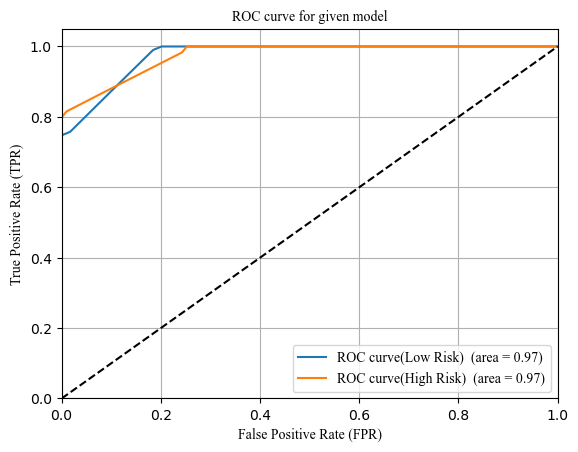

In [44]:
display_roc(knn_sel, X2, y)

In [45]:
#With LDA

accuracy:  0.9385365853658536
precision:  0.9391408579934607
recall:  0.9385365853658536
F1-score:  0.9385804254692077


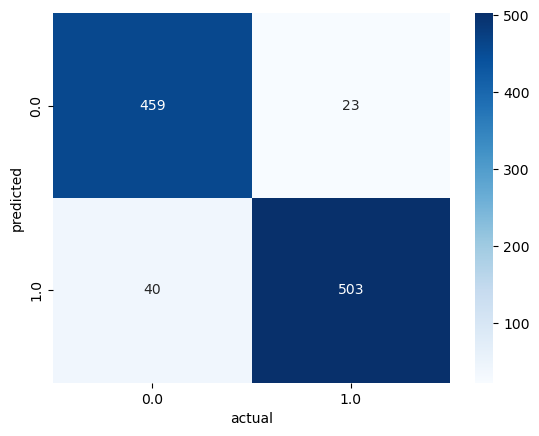

In [46]:
dec_tree_lda = DecisionTreeClassifier(max_depth = 7)
y_pred_lda = cross_val_predict(dec_tree_lda, X_lda, y, cv=kf)
score_data_classify(y_pred_lda, y)

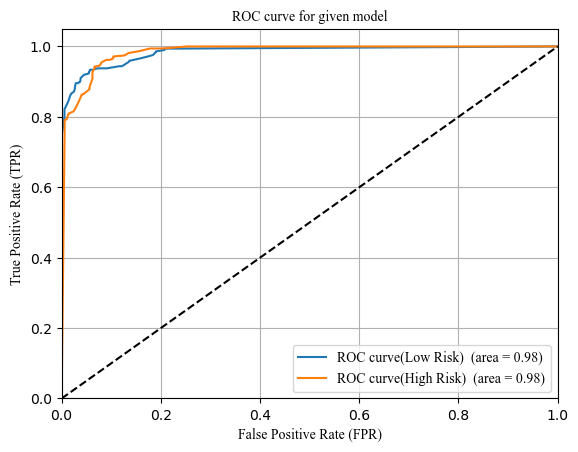

In [47]:
display_roc(dec_tree_lda, X_lda, y)

accuracy:  0.8360975609756097
precision:  0.8483448283936881
recall:  0.8360975609756097
F1-score:  0.8373887893092089


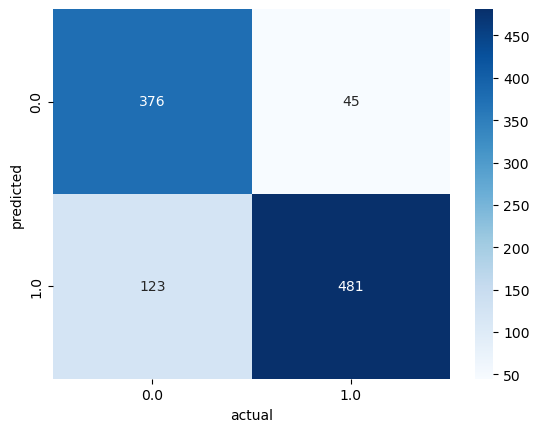

In [48]:
bayes_lda = GaussianNB()
bayes_predict_lda = cross_val_predict(bayes_lda, X_lda, y, cv=kf)
score_data_classify(bayes_predict_lda, y)

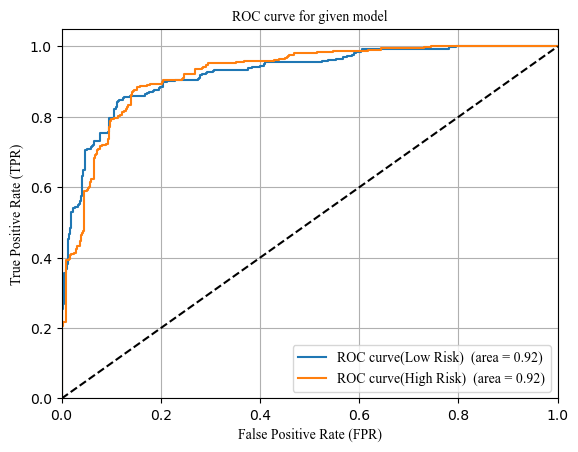

In [49]:
display_roc(bayes_lda, X_lda, y)

accuracy:  0.8478048780487805
precision:  0.8533629179902975
recall:  0.8478048780487805
F1-score:  0.8484035252522761


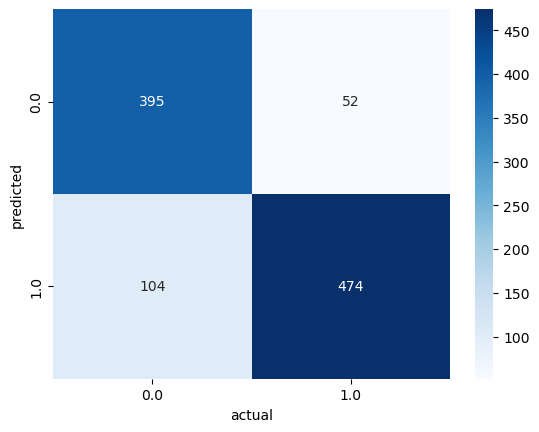

In [50]:
logmodel_lda = LogisticRegression(max_iter = 1000)
lpredictions_lda = cross_val_predict(logmodel_lda, X_lda, y, cv = kf)
score_data_classify(lpredictions_lda, y)

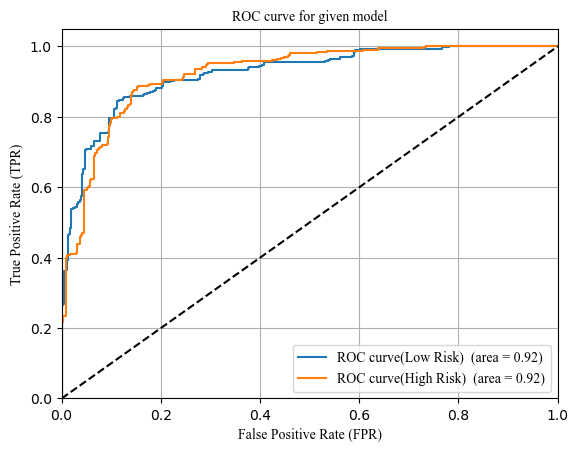

In [51]:
display_roc(logmodel_lda, X_lda, y)

accuracy:  0.895609756097561
precision:  0.8970561135253907
recall:  0.895609756097561
F1-score:  0.8956155190074461


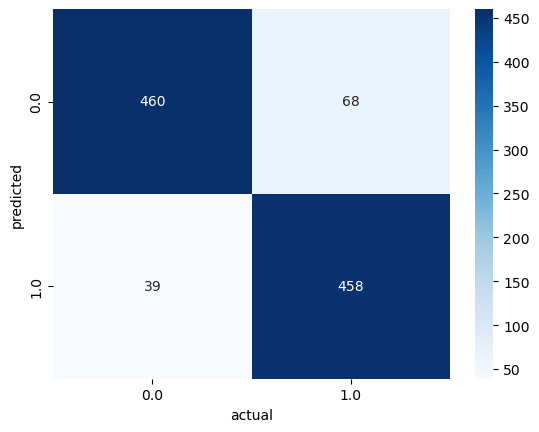

In [52]:
knn_lda = KNeighborsClassifier()
kpredict_lda = cross_val_predict(knn_lda, X_lda, y, cv = kf)
score_data_classify(kpredict_lda, y)

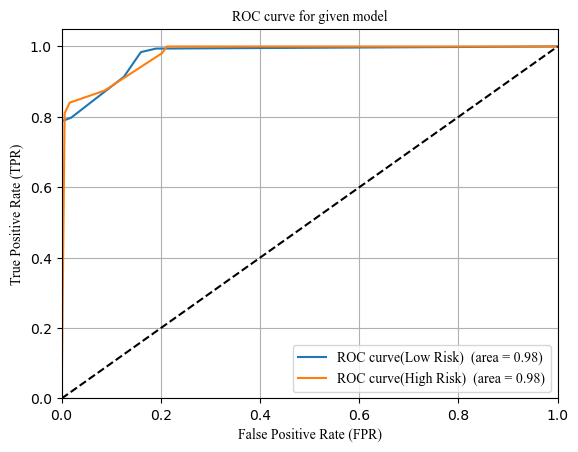

In [53]:
display_roc(knn_lda, X_lda, y)